In [85]:
! pip install kaggle

In [86]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [87]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [88]:
! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
! unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mall_Customers.csv      


# Importing libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


# Data Loading and exploration

In [91]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df.shape

(200, 5)

In [93]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data visualization

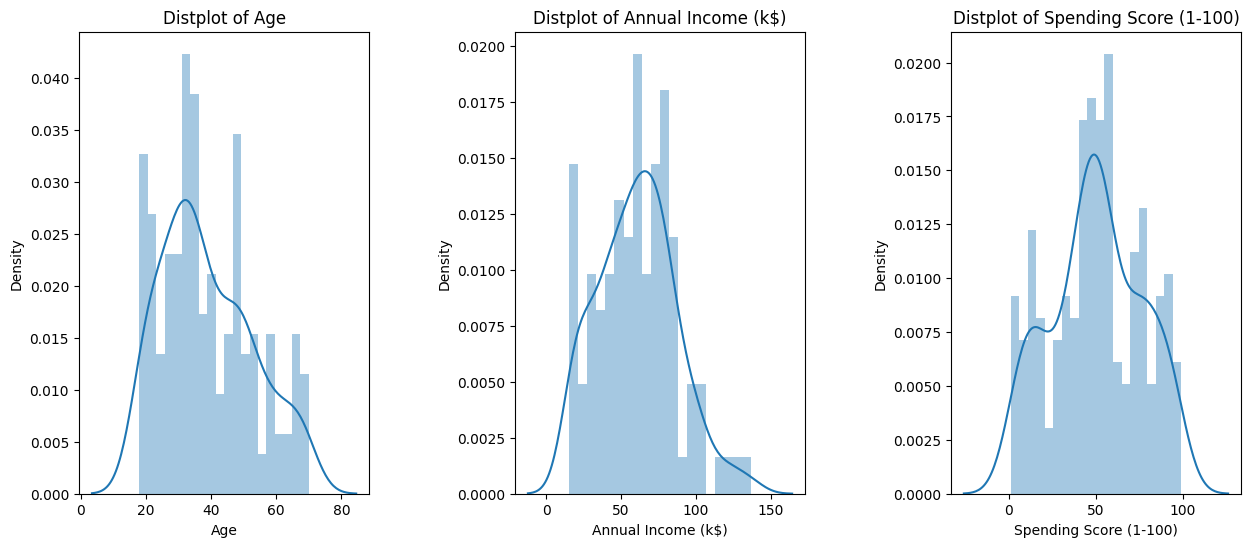

In [96]:
figure = plt.figure(1, figsize = (15, 6))

n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n )
  sns.distplot(df[x], bins = 20)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  plt.title('Distplot of {}'.format(x))
plt.show()


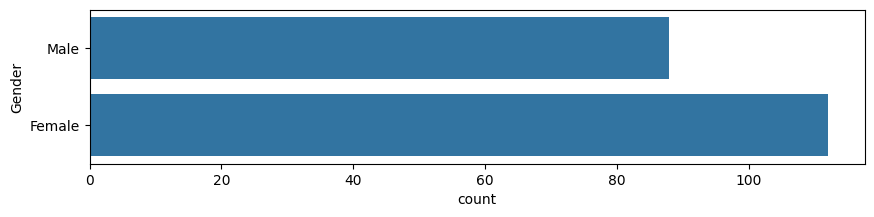

In [97]:
plt.figure(1, figsize = (10, 2))
sns.countplot(y = 'Gender', data = df)
plt.show()

# Clustering based on 2 Features

In [144]:
df1 = df[['CustomerID','Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x = df1[['Annual Income (k$)', 'Spending Score (1-100)']]


In [145]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


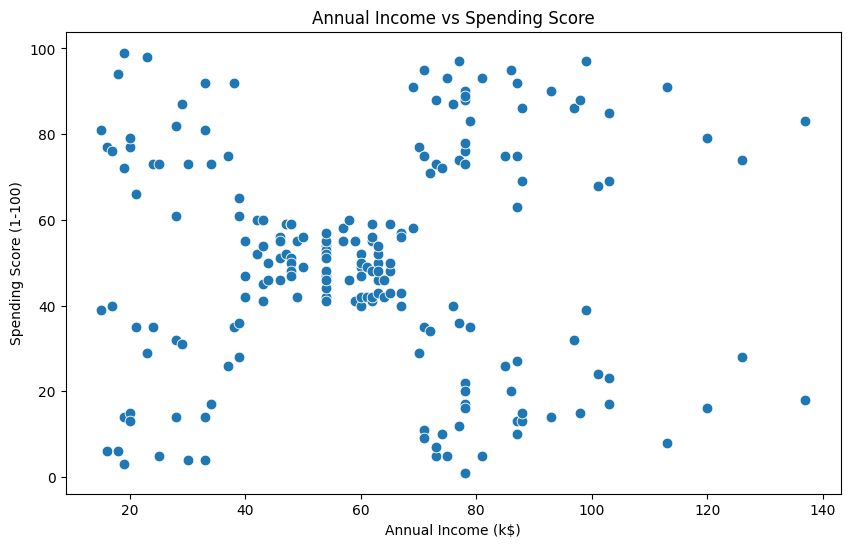

In [146]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = x, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

# Determine Optimal Number of cluster and Apply K-means Clustering

In [147]:
# Using elbow method

wcss =[]

for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  km.fit(x)
  wcss.append(km.inertia_)

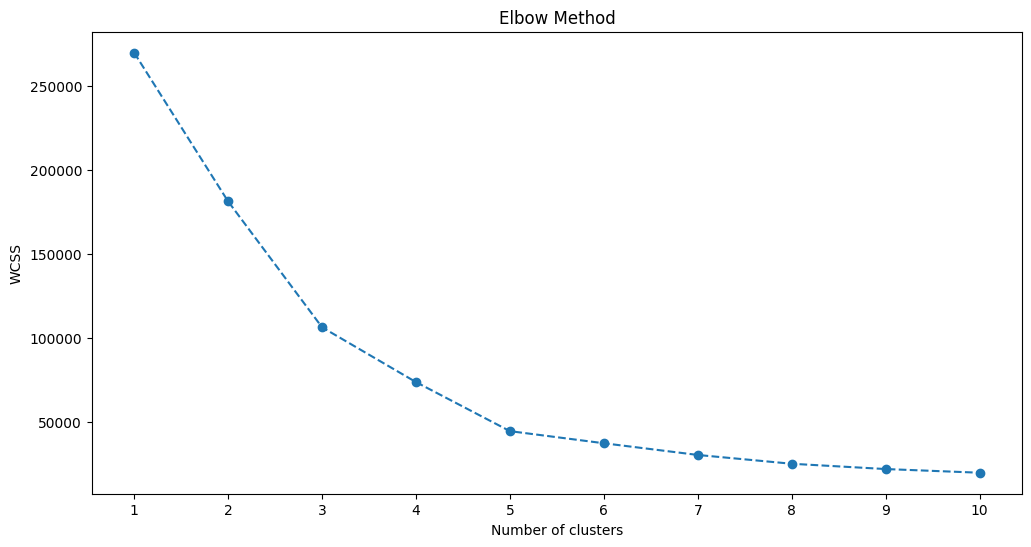

In [148]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss,marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

The elbow graph illustrate the relationship between the number of cluster(k) and the within-cluster in WCSS sharply changes represent the optiomal number of clusters,as it balances cluster cohesion with the model simplicity

In [149]:
optimal_cluster = 5

# Applying K-means clustering with optimal no. of cluster

In [150]:
km1 = KMeans(n_clusters = optimal_cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
km1.fit(x)
y = km1.predict(x)
df['label'] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,label
0,1,Male,19,15,39,2,2
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,2,2


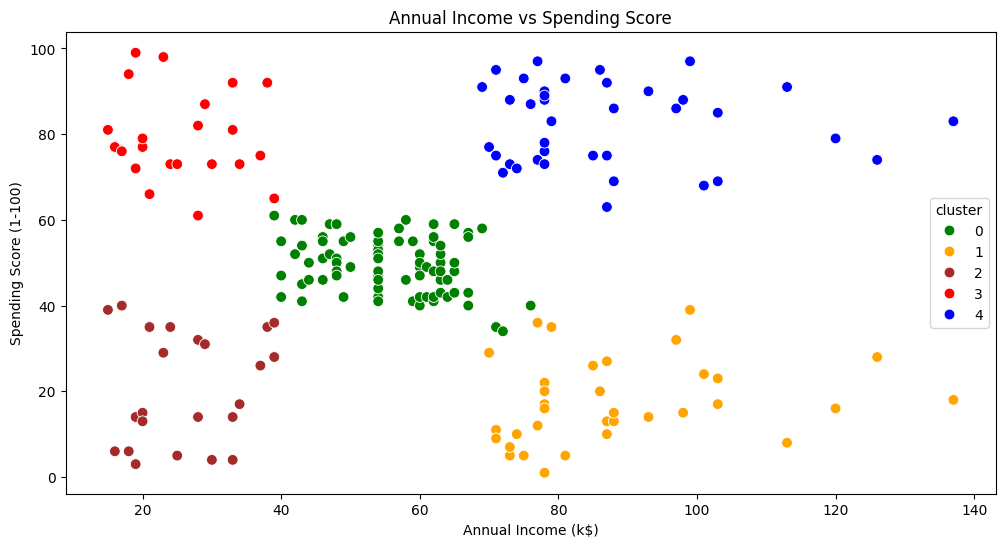

In [151]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = "cluster",legend = 'full', s=60, palette = ['green', 'orange', 'brown','red', 'blue'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.

# Clustering based on 3 features

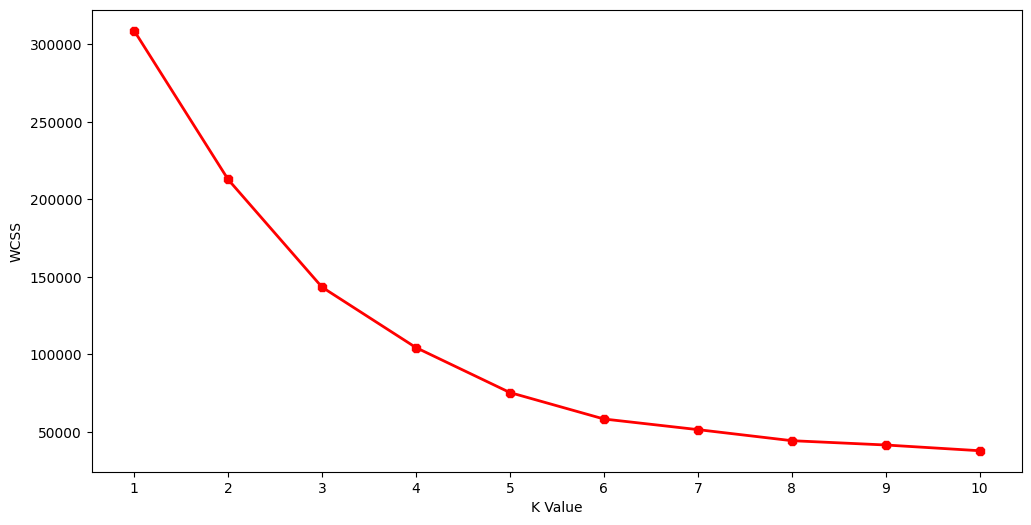

In [152]:
df2 = df[['CustomerID','Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [153]:
km2 = KMeans(n_clusters=5, init="k-means++")
y2 = km.fit_predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,8
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,8


# 3D Plot

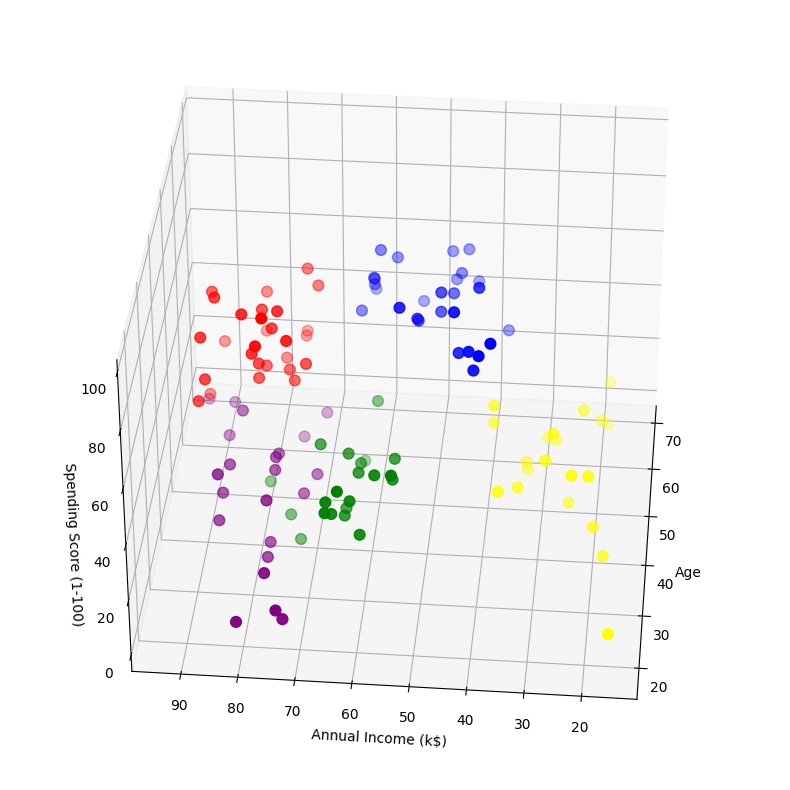

In [154]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Testing the model

In [155]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 28
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 2nd group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 3rd group= 22
They are - [129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179]
--------------------------------------------
Number of customer in 4th group= 21
They are - [ 76  79  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121
 125 133 143]
--------------------------------------------
Number of customer in 5th group= 20
They are - [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
--------------------------------------------


# Evaluating the performance using silhouette score


In [106]:
train_silhoutte_score = silhouette_score(x_train_scaler, train_cluster_labels)
test_silhoutte_score = silhouette_score(x_test_scaler, cluster_labels)

print("Training Silhouette Score : ", train_silhoutte_score)
print("Testing Silhouette Score : ", test_silhoutte_score)

Training Silhouette Score :  0.4172682022952781
Testing Silhouette Score :  0.42525734050562375
